In [1]:
import pandas as pd

In [2]:
# Read dataset2 csv
dataset2 = pd.read_csv('data/Dataset2.csv')

In [3]:
# Read Category Mappings csv
category_mappings = pd.read_csv('data/Category Mapping.csv')

In [4]:
# Get the Category column from the category_mappings dataframe and merge to dataset2_encoded
dataset2_categ = pd.merge(dataset2, category_mappings[['Subcategory', 'Category']], on='Subcategory', how='left')

In [5]:
dataset2_categ

,StoreId,DateTime,InvoiceGlobalId,Subcategory,Quantity,Revenue,Category
0,8537,2023-10-17 22:05:19.000,8412_452536,GREEK COFFEE,1,2.2,COFFEE
1,4099,2023-10-08 19:06:09.000,4099_1277028,RYO,4,30.8,TOBACCO
2,8537,2023-10-18 20:33:00.000,8412_452839,ENERGY DRINK,1,0.8,SOFT DRINKS
3,6748,2023-10-12 08:36:31.000,6748_853300,TOBACCO ACCESSORIES,2,0.9,TOBACCO COMPL
4,4099,2023-10-18 18:10:06.000,4099_1282071,JELLIES,3,3.3,GUMS & CANDIES
...,...,...,...,...,...,...,...
219219,8537,2023-10-07 20:03:42.000,8412_448618,ENERGY DRINK,1,1.5,SOFT DRINKS
219220,10130,2023-10-07 23:24:52.000,8505_716266,NIBBLES,1,1.2,CHOCOLATE
219221,7385,2023-10-31 18:25:20.000,7385_404476,LONG LIFE JUICE,1,2.1,SOFT DRINKS
219222,10502,2023-11-03 20:59:57.000,8553_262736,DIGESTIVE,1,2.2,BISCUITS


In [6]:
# Get top categories by revenue
dataset2_categ.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

Category
TOBACCO                             577853.75
TICKETING AND ADMISSION SERVICES     83431.25
SOFT DRINKS                          68584.35
ALCOHOLIC BEVERAGES                  54155.64
SNACKS                               42639.87
CHOCOLATE                            24975.13
TOBACCO COMPL                        22654.27
PACKAGED FOOD                        20574.40
ICE CREAM                            14182.80
HOME & PERSONAL CARE                 13328.43
GUMS & CANDIES                       13125.96
MILK                                 11797.90
BISCUITS                              9061.82
DAIRY                                 8764.72
PET CARE                              5043.63
TOYS                                  4145.77
COFFEE                                3924.32
PRINT                                 1947.57
Name: Revenue, dtype: float64

## We will proceed to analyze the top 4 categories by revenue

In [7]:
# Convert DateTime column to datetime format
dataset2_categ['DateTime'] = pd.to_datetime(dataset2_categ['DateTime'])

# Create new columns for year, month, day, hour, minute, second
dataset2_categ['Year'] = dataset2_categ['DateTime'].dt.year
dataset2_categ['Month'] = dataset2_categ['DateTime'].dt.month
dataset2_categ['Day'] = dataset2_categ['DateTime'].dt.day
dataset2_categ['Hour'] = dataset2_categ['DateTime'].dt.hour
# dataset2_categ['Minute'] = dataset2_categ['DateTime'].dt.minute

# Create new column for day of week
dataset2_categ['DayOfWeek'] = dataset2_categ['DateTime'].dt.dayofweek
dataset2_categ['DayOfWeek'] = dataset2_categ['DayOfWeek'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                           4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
# Create new column for time of day
dataset2_categ['TimeOfDay'] = dataset2_categ['Hour'].apply(lambda x: 'Morning' if 6 <= x < 12 else ('Afternoon' if 12 <= x < 18 else 'Evening'))
dataset2_categ['MonthName'] = dataset2_categ['Month'].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                       5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                       9: 'September', 10: 'October', 11: 'November', 12: 'December'})

In [8]:
dataset2_categ

,StoreId,DateTime,InvoiceGlobalId,Subcategory,Quantity,Revenue,Category,Year,Month,Day,Hour,DayOfWeek,TimeOfDay,MonthName
0,8537,2023-10-17 22:05:19,8412_452536,GREEK COFFEE,1,2.2,COFFEE,2023,10,17,22,Tuesday,Evening,October
1,4099,2023-10-08 19:06:09,4099_1277028,RYO,4,30.8,TOBACCO,2023,10,8,19,Sunday,Evening,October
2,8537,2023-10-18 20:33:00,8412_452839,ENERGY DRINK,1,0.8,SOFT DRINKS,2023,10,18,20,Wednesday,Evening,October
3,6748,2023-10-12 08:36:31,6748_853300,TOBACCO ACCESSORIES,2,0.9,TOBACCO COMPL,2023,10,12,8,Thursday,Morning,October
4,4099,2023-10-18 18:10:06,4099_1282071,JELLIES,3,3.3,GUMS & CANDIES,2023,10,18,18,Wednesday,Evening,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219219,8537,2023-10-07 20:03:42,8412_448618,ENERGY DRINK,1,1.5,SOFT DRINKS,2023,10,7,20,Saturday,Evening,October
219220,10130,2023-10-07 23:24:52,8505_716266,NIBBLES,1,1.2,CHOCOLATE,2023,10,7,23,Saturday,Evening,October
219221,7385,2023-10-31 18:25:20,7385_404476,LONG LIFE JUICE,1,2.1,SOFT DRINKS,2023,10,31,18,Tuesday,Evening,October
219222,10502,2023-11-03 20:59:57,8553_262736,DIGESTIVE,1,2.2,BISCUITS,2023,11,3,20,Friday,Evening,November


## 1. Analyse at what time of the day and day of the week, are TOBACCOS sold the most?

In [9]:
# Filter dataset2_categ for TOBACCO category`
dataset2_categ_tobacco = dataset2_categ[dataset2_categ['Category'] == 'TOBACCO']

In [10]:
# Get top days of the week by revenue
dataset2_categ_tobacco.groupby('DayOfWeek')['Revenue'].sum().sort_values(ascending=False)

DayOfWeek
Friday       85987.45
Saturday     85619.35
Wednesday    83715.15
Monday       82055.65
Thursday     80842.20
Tuesday      80732.65
Sunday       78901.30
Name: Revenue, dtype: float64

In [11]:
# Group by month,day,hour and InvoiceGlobalID
grouped_data = dataset2_categ_tobacco.groupby(['DayOfWeek', 'Hour']).agg({
    'InvoiceGlobalId': 'nunique',  # Counting the number of unique transactions per group
    'Revenue': 'sum'      # Summing up the revenue per group
}).reset_index()

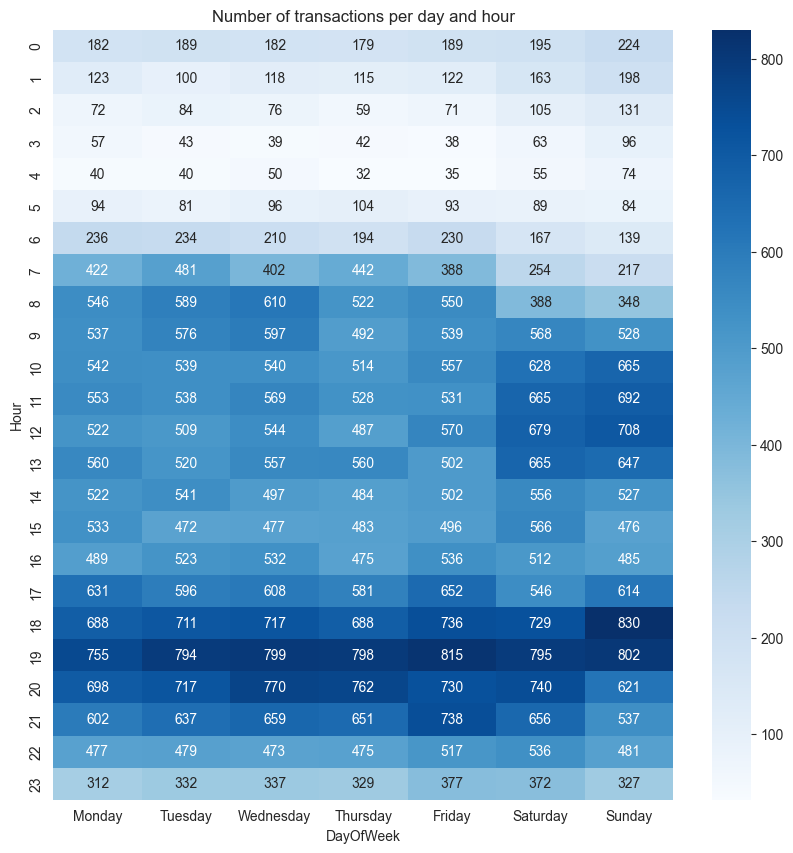

In [12]:
# Create a heatmap of the number of transactions per day and hour
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table and sort the columns by day of week for month 10
pivot_table = grouped_data.pivot_table(index='Hour', columns='DayOfWeek', values='InvoiceGlobalId').reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create heatmap
plt.figure(figsize=(10, 10))
# Make the cmap to be a gradient of blue but for the lowest value to be white
cmap = 'Blues'
sns.heatmap(pivot_table, annot=True, fmt='g', cmap=cmap)
plt.title('Number of transactions per day and hour')
plt.show()



## 2. Analyse at what time of the day and day of the week, are TICKETS sold the most?

In [13]:
# Filter dataset2_categ for TICKETS category`
dataset2_categ_tickets = dataset2_categ[dataset2_categ['Category'] == 'TICKETING AND ADMISSION SERVICES']

In [14]:
# Get top days of the week by revenue
dataset2_categ_tickets.groupby('DayOfWeek')['Revenue'].sum().sort_values(ascending=False)

DayOfWeek
Sunday       14543.10
Saturday     13657.50
Friday       12215.75
Thursday     11269.70
Wednesday    10948.95
Tuesday      10752.40
Monday       10043.85
Name: Revenue, dtype: float64

In [15]:
# Group by month,day,hour and InvoiceGlobalID
grouped_data = dataset2_categ_tickets.groupby(['DayOfWeek', 'Hour']).agg({
    'InvoiceGlobalId': 'nunique',  # Counting the number of unique transactions per group
    'Revenue': 'sum'  # Summing up the revenue per group
}).reset_index()



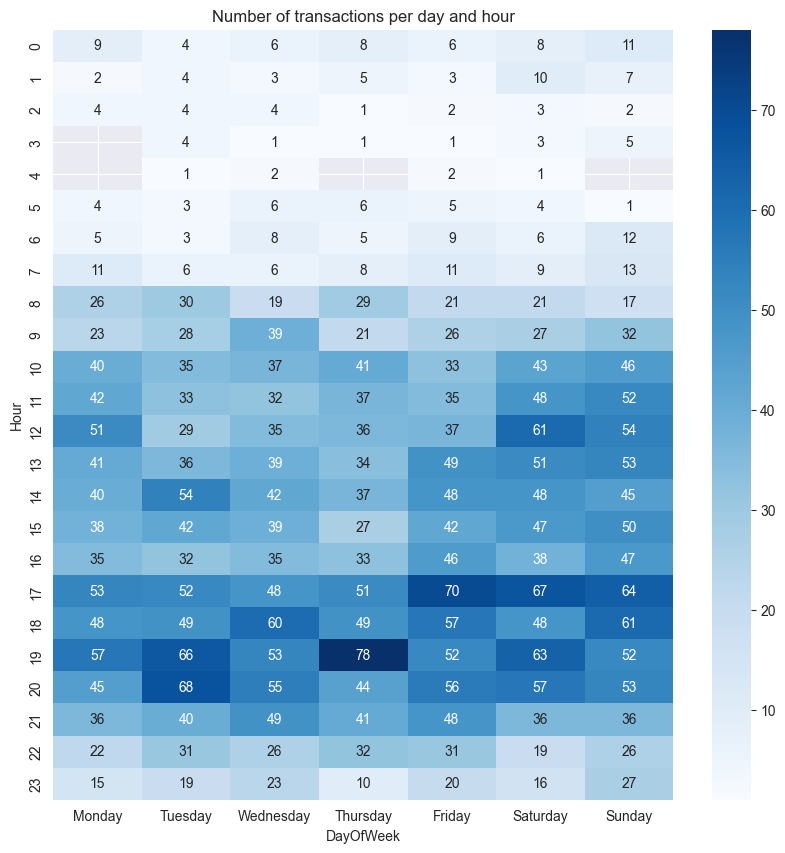

In [16]:
# Create a heatmap of the number of transactions per day and hour
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table and sort the columns by day of week for month 10
pivot_table = grouped_data.pivot_table(index='Hour', columns='DayOfWeek', values='InvoiceGlobalId').reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create heatmap
plt.figure(figsize=(10, 10))
# Make the cmap to be a gradient of blue but for the lowest value to be white
cmap = 'Blues'
sns.heatmap(pivot_table, annot=True, fmt='g', cmap=cmap)
plt.title('Number of transactions per day and hour')
plt.show()


## 3. Analyse at what time of the day and day of the week, are SOFT DRINKS sold the most?

In [17]:
# Filter dataset2_categ for SOFT DRINKS category
dataset2_categ_soft_drinks = dataset2_categ[dataset2_categ['Category'] == 'SOFT DRINKS']

In [18]:
# Get top days of the week by revenue
dataset2_categ_soft_drinks.groupby('DayOfWeek')['Revenue'].sum().sort_values(ascending=False)

DayOfWeek
Sunday       12969.13
Saturday     10576.29
Friday        9702.62
Tuesday       9083.34
Thursday      8905.23
Monday        8764.14
Wednesday     8583.60
Name: Revenue, dtype: float64

In [19]:
# Group by month,day,hour and InvoiceGlobalID
grouped_data = dataset2_categ_soft_drinks.groupby(['DayOfWeek', 'Hour']).agg({
    'InvoiceGlobalId': 'nunique',  # Counting the number of unique transactions per group
    'Revenue': 'sum'  # Summing up the revenue per group
}).reset_index()

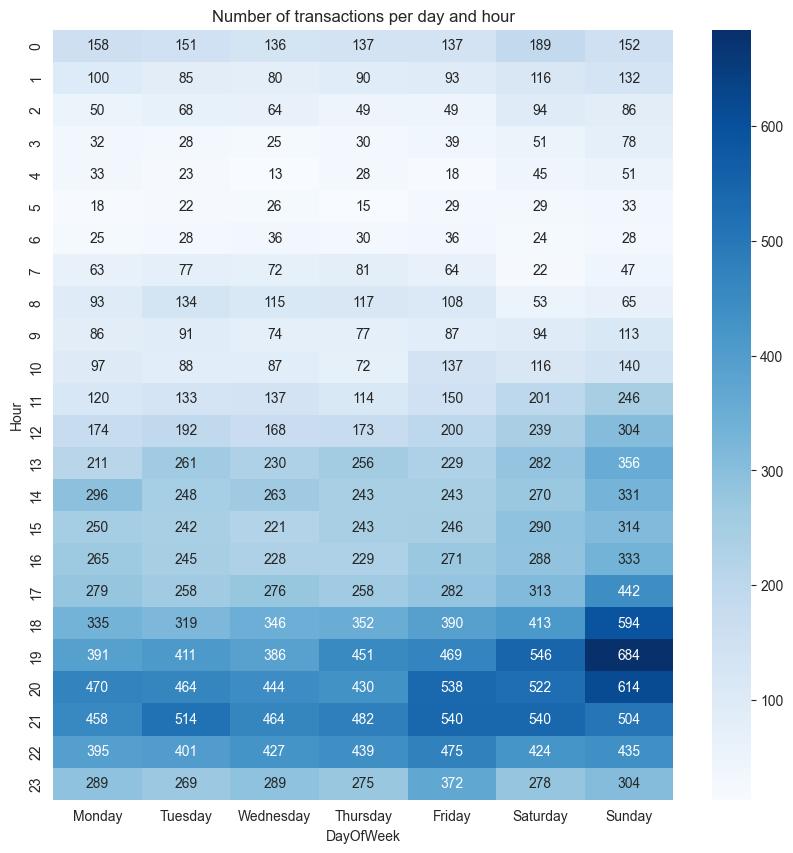

In [20]:
# Create a heatmap of the number of transactions per day and hour
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table and sort the columns by day of week for month 10
pivot_table = grouped_data.pivot_table(index='Hour', columns='DayOfWeek', values='InvoiceGlobalId').reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create heatmap
plt.figure(figsize=(10, 10))
# Make the cmap to be a gradient of blue but for the lowest value to be white
cmap = 'Blues'
sns.heatmap(pivot_table, annot=True, fmt='g', cmap=cmap)
plt.title('Number of transactions per day and hour')
plt.show()